In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
from matplotlib.ticker import LogFormatter

In [2]:
alg_label = ["Original",
             "Lqdags"]
        
queries_label = ["j3","j4","p2","p3","p4","s1","s2","s3","s4","t2","t3","t4","ti2","ti3","ti4","tr1","tr2"]
#queries_label = ["j3","j4","p2","p3","p4","s1","s2","s3","s4","t2","t3","t4","ti2","ti3","tr1","tr2"]

queries_title = ["J3","J4","P2","P3","P4","S1","S2","S3","S4","T2","T3","T4","Ti2","Ti3","Ti4","Tr1","Tr2"]
#queries_title = ["J3","J4","P2","P3","P4","S1","S2","S3","S4","T2","T3","T4","Ti2","Ti3","Tr1","Tr2"]

In [3]:
# box plots for each query
# TDO hacer un for para cada query y función y tamaño k
j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
data = [j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]

datasets = []
file_orig = "results-nodes-lqdags.csv"
#file_lqdags = "results-nodes-v2.csv"


original = pd.read_csv(f'../../original/{file_orig}',delimiter=';')
original = original.head(4)


lqdags = pd.read_csv(f'../../original/{file_orig}',delimiter=';') #pd.read_csv(f'../../lqdags/{file_lqdags}',delimiter=';')
lqdags.replace(0, np.nan, inplace=True)

datasets = [original,
               lqdags]

#   print(i)
for j,query in enumerate(queries_label):
    data[j] = [original[query],
                     lqdags[query]] 

In [4]:
datasets[1]

,k,j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2
0,1,516373,11665814,8786,96716,3829449,12315,242455,69391,207724,2007,78624,132124,8120,528657,959463,2501,8864
1,10,899792,21661578,66270,376841,7674557,35409,596784,220556,727091,8321,240155,573229,28631,1068865,1252256,10260,35635
2,100,1064836,27308409,86085,457137,13961317,49266,658146,271709,730345,47585,357297,581551,71158,1769674,1252256,11524,36458
3,1000,1435452,34692006,108967,481656,14248826,49320,666617,278467,730345,64331,384982,606201,168174,1903684,1252256,11876,41673


In [83]:
datasets[0]['k']

0       1
1      10
2     100
3    1000
Name: k, dtype: int64

In [5]:
# colors:
# https://matplotlib.org/stable/gallery/color/named_colors.html
#colors = ['hotpink','red','peru']#, 'lightsalmon', 'gold', 'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']
colors = ['#de2d26', '#3f007d']#, 'darkturquoise', 'mediumspringgreen', 'lime']
linestyles = ['--', ':']  # Different patterns

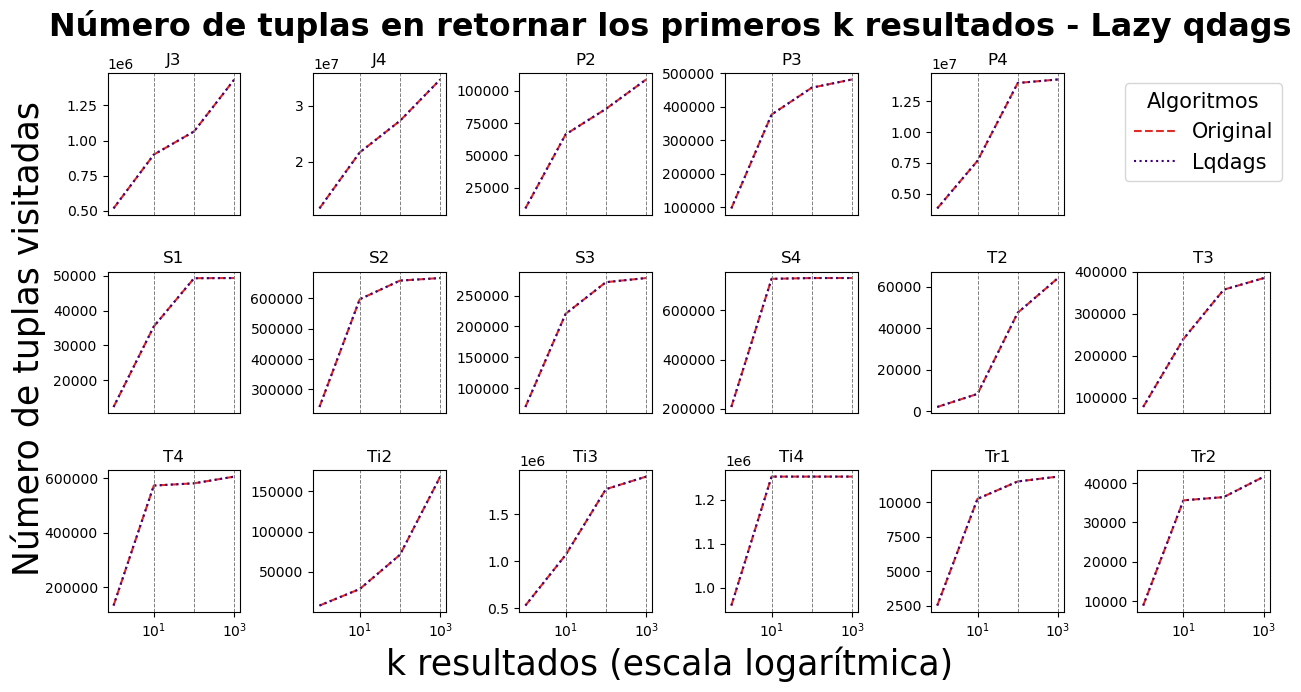

In [7]:
# Crear la figura
fig = plt.figure(figsize=(15, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(3, 6, figure=fig, hspace=0.4, wspace=0.55)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])
p3 = fig.add_subplot(gs[0, 3])
p4 = fig.add_subplot(gs[0, 4])
color_legend = fig.add_subplot(gs[0, 5]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[1, 0])
s2 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 2])
s4 = fig.add_subplot(gs[1, 3])
t2 = fig.add_subplot(gs[1, 4])
t3 = fig.add_subplot(gs[1, 5])

t4 = fig.add_subplot(gs[2, 0])
ti2 = fig.add_subplot(gs[2, 1])
ti3 = fig.add_subplot(gs[2, 2])
ti4 = fig.add_subplot(gs[2, 3])
tr1 = fig.add_subplot(gs[2, 4])
tr2 = fig.add_subplot(gs[2, 5])

#ti4.set_xlabel('k results (log scale)')

# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j], linestyle=linestyles[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title[i])
    query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
    if(query != t4 and query != t4 and query != ti2 and query != ti3 and query != tr1 and query != tr2 and query != ti4):
        query.axes.get_xaxis().set_visible(False)
        
handles, labels = j3.get_legend_handles_labels()


color_legend.legend(
    handles,
    labels,
    loc='upper center',
    fontsize=15,  # Increase font size for the legend
    title='Algoritmos',  # Add title
    title_fontsize=15  # Set font size for the title
)


fig.text(0.5, 0.02, 'k resultados (escala logarítmica)', ha='center', fontsize=25)
fig.text(0.06, 0.5, 'Número de tuplas visitadas', va='center', rotation='vertical', fontsize=25)
# Add a title to the entire figure
fig.suptitle('Número de tuplas en retornar los primeros k resultados - Lazy qdags', fontsize=23, fontweight='bold', y=0.97)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-nodes-ppt.pdf')

plt.show()
 

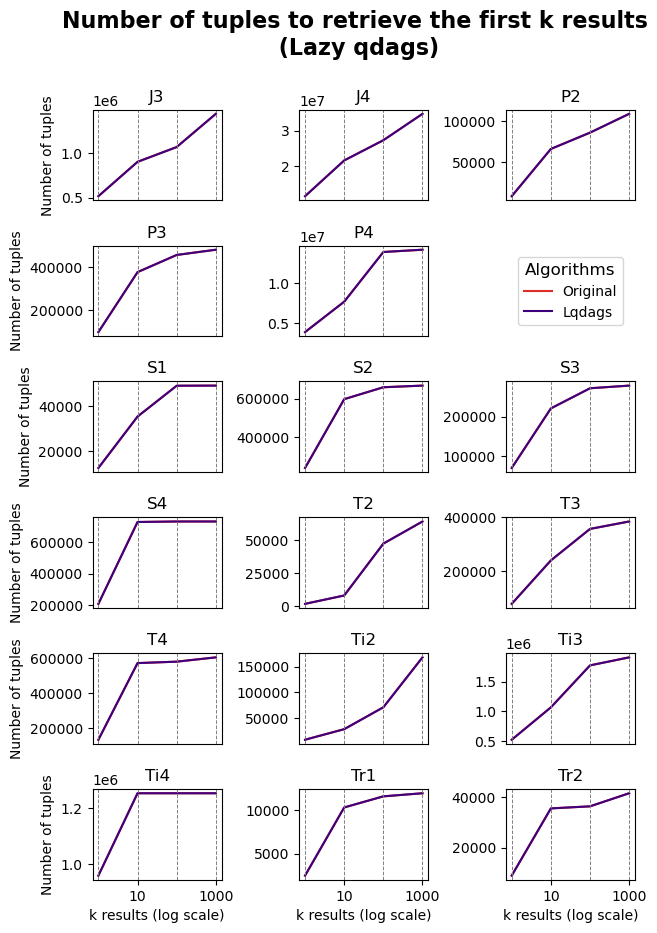

In [8]:
# Crear la figura
fig = plt.figure(figsize=(7, 10))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(6, 3, figure=fig, hspace=0.5, wspace=0.6)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1, 0])
p4 = fig.add_subplot(gs[1, 1])
color_legend = fig.add_subplot(gs[1, 2]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[2, 0])
s2 = fig.add_subplot(gs[2, 1])
s3 = fig.add_subplot(gs[2,2])

s4 = fig.add_subplot(gs[3, 0])
t2 = fig.add_subplot(gs[3, 1])
t3 = fig.add_subplot(gs[3, 2])

t4 = fig.add_subplot(gs[4, 0])
ti2 = fig.add_subplot(gs[4, 1])
ti3 = fig.add_subplot(gs[4, 2])

ti4 = fig.add_subplot(gs[5, 0])
tr1 = fig.add_subplot(gs[5, 1])
tr2 = fig.add_subplot(gs[5, 2])

j3.set_ylabel('Number of tuples')
p3.set_ylabel('Number of tuples')
s1.set_ylabel('Number of tuples')
s4.set_ylabel('Number of tuples')
t4.set_ylabel('Number of tuples')
ti4.set_ylabel('Number of tuples')
#ti4.set_ylabel('Time (s)')

tr1.set_xlabel('k results (log scale)')
tr2.set_xlabel('k results (log scale)')
ti4.set_xlabel('k results (log scale)')


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title[i])
    query.axvline(x=1, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
    query.xaxis.set_major_formatter(LogFormatter())
    #query.yaxis.set_major_formatter(LogFormatter())
    if(query != tr1 and query != tr2 and query != ti4):
        query.axes.get_xaxis().set_visible(False)
        
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=10,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=12  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
fig.suptitle('Number of tuples to retrieve the first k results\n (Lazy qdags)', fontsize=16, fontweight='bold',y=0.98)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-nodes-tesis.pdf')

plt.show()
 

In [87]:
## SECOND SCENARIO --> V1000

In [8]:

alg_label = ["Original",
            "Lqdags"]
queries_title_v1000 = ["J3","J4","P2","P3","P4","S3","T2","T4","Ti2","Ti3"] #"S3","T3","Ti4 (log scale)"
queries_label_v1000=["j3","j4","p2","p3","p4","s3","t2","t4","ti2","ti3"] # "s3", "t3","ti4"

In [9]:
j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
data_v1000 = [j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]
datasets_v1000 =[]

file = "results-nodes-lqdags.csv"
file_lqdags = "results-nodes.csv"
#print(file)

original = pd.read_csv(f'../../query1000results/original/{file}',delimiter=';')
original = original.head(4)
# Drop columns where all values are zero
original = original.loc[:, (original != 0).any(axis=0)]

lqdags = pd.read_csv(f'../../query1000results/lqdags/{file_lqdags}',delimiter=';')
# Drop columns where all values are zero
lqdags = lqdags.loc[:, (lqdags != 0).any(axis=0)]

#lqdags.replace(0, np.nan, inplace=True)


datasets_v1000 = [original,
                     lqdags]

#   print(i)
for j,query in enumerate(queries_label_v1000):
    data_v1000[j] = [original[query],
                     lqdags[query]]
        

In [10]:
datasets_v1000[0]

,k,j3,j4,p2,p3,p4,s3,t2,t4,ti2,ti3
0,1,24962,20033,180,35351,524234,23,43,67,4071,1214165
1,10,28081,24057,1327,64222,3413974,98,2479,4161,6424,1708386
2,100,100166,297816,11899,104497,3515544,972,85305,11194,25685,1895197
3,1000,788256,1079782,80196,193895,3515544,9904,159495,231150,339803,4452018


In [11]:
datasets_v1000[1]

,k,j3,j4,p2,p3,p4,s3,t2,t4,ti2,ti3
0,1,24962,20033,180,35351,524234,23,43,67,4071,1214165
1,10,28081,24057,1327,64222,3413974,98,2479,4161,6424,1708386
2,100,100166,297816,11899,104497,3515544,972,85305,11194,25685,1895197
3,1000,788256,1079782,80196,193895,3515544,9904,159495,231150,339803,4452018


In [12]:
# colors:
# https://matplotlib.org/stable/gallery/color/named_colors.html
#colors = ['hotpink','red','peru']#, 'lightsalmon', 'gold', 'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']
colors = ['red', 'fuchsia']#, 'darkturquoise', 'mediumspringgreen', 'lime']
colors = ['#de2d26', '#3f007d']#, 'darkturquoise', 'mediumspringgreen', 'lime']
linestyles = ['--', ':']  # Different patterns


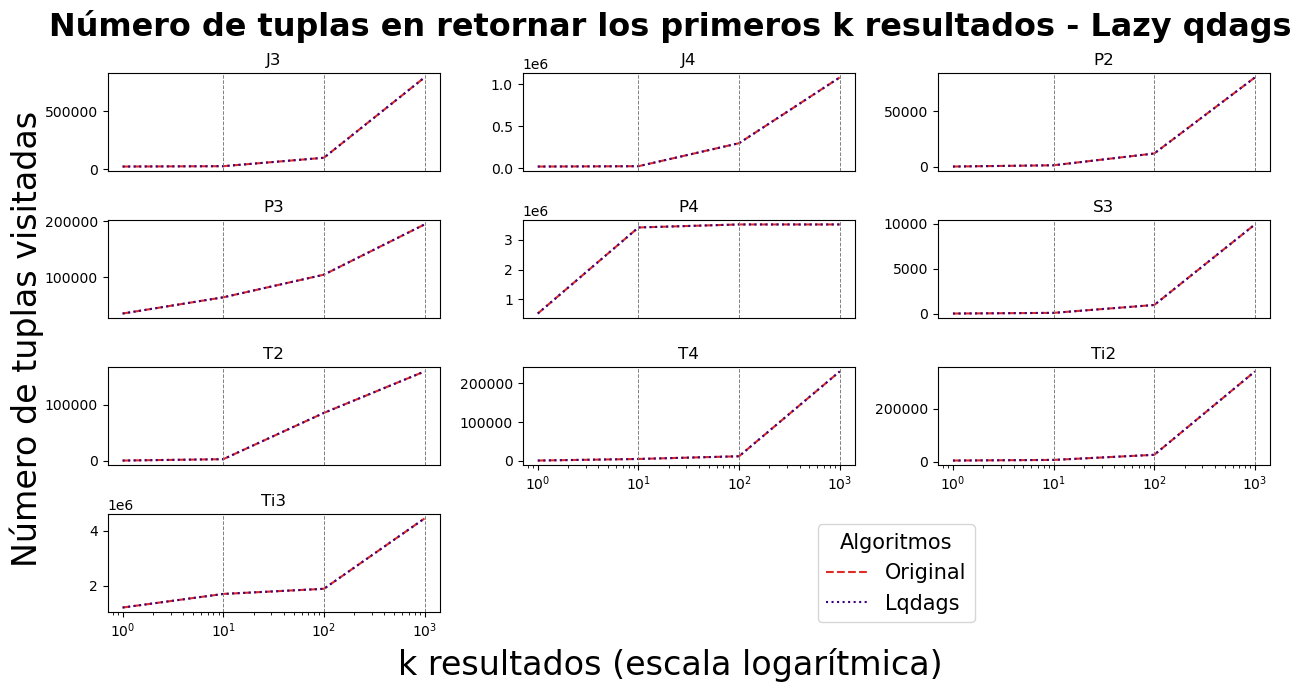

In [14]:
# Crear la figura
fig = plt.figure(figsize=(15, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(4, 3, figure=fig, hspace=0.5, wspace=0.25)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1, 0])
p4 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 2])

t2 = fig.add_subplot(gs[2, 0])
t4 = fig.add_subplot(gs[2, 1])
ti2 = fig.add_subplot(gs[2, 2])
ti3 = fig.add_subplot(gs[3, 0])
color_legend = fig.add_subplot(gs[3, 1:3]) # Space for the legend
color_legend.axis('off')  # Hide the axis


# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)

for i,query in enumerate([j3,j4,p2,p3,p4,s3,t2,t4,ti2,ti3]): #([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets_v1000[0]['k'], data_v1000[i][j], marker='', color=colors[j], label=alg_label[j], linestyle=linestyles[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title_v1000[i])
    query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
    
    if(query != ti2 and query != ti3 and query != t4):
        query.axes.get_xaxis().set_visible(False)
        
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='upper center',
    fontsize=15,  # Increase font size for the legend
    title='Algoritmos',  # Add title
    title_fontsize=15  # Set font size for the title
)


fig.text(0.5, 0.02, 'k resultados (escala logarítmica)', ha='center', fontsize=24)
fig.text(0.06, 0.5, 'Número de tuplas visitadas', va='center', rotation='vertical', fontsize=24)
# Add a title to the entire figure
fig.suptitle('Número de tuplas en retornar los primeros k resultados - Lazy qdags', fontsize=23, fontweight='bold', y=0.97)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-v1000-nodes-ppt.pdf')

plt.show()
 

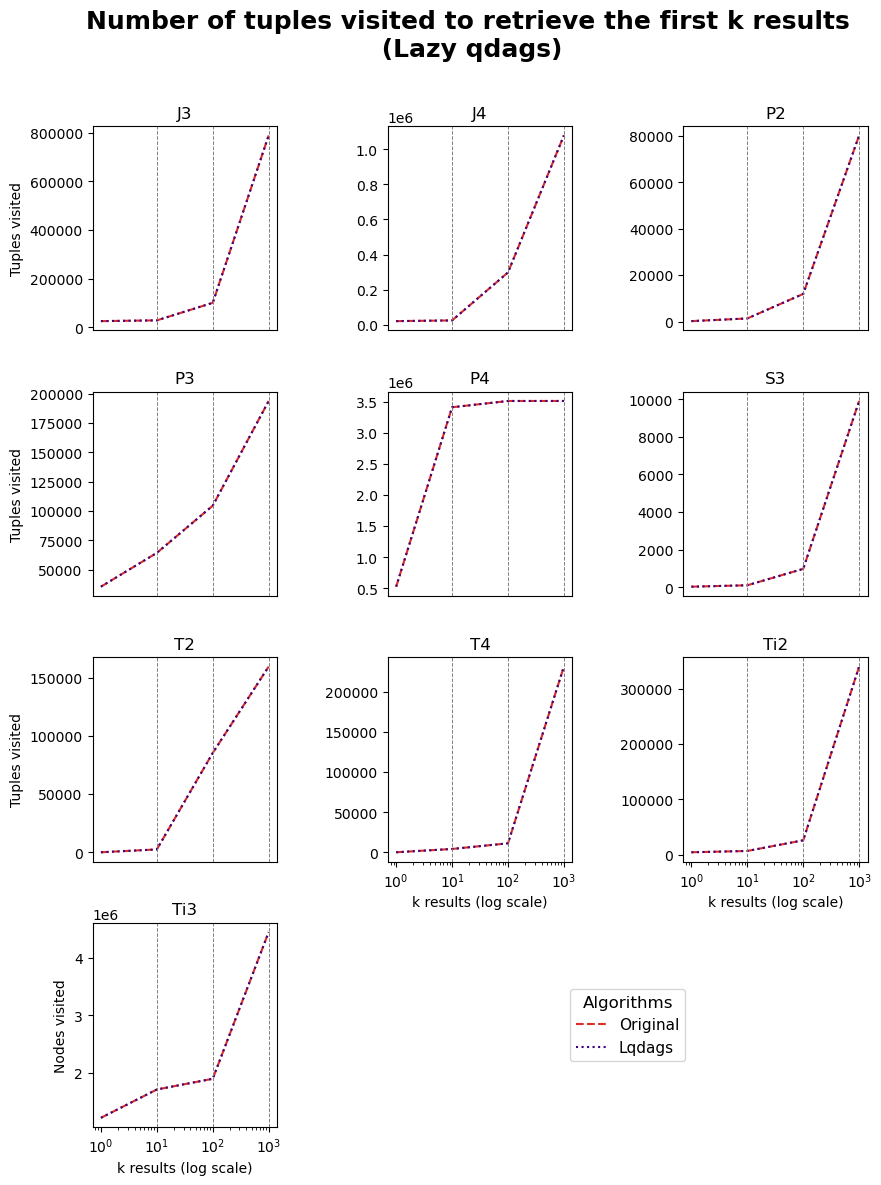

In [94]:
# version tesis
# Crear la figura
fig = plt.figure(figsize=(10,13))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(4, 3, figure=fig, hspace=0.3, wspace=0.6)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1, 0])
p4 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 2])

color_legend = fig.add_subplot(gs[1, 2]) # Space for the legend
color_legend.axis('off')  # Hide the axis

t2 = fig.add_subplot(gs[2, 0])
#t3 = fig.add_subplot(gs[2, 1])
t4 = fig.add_subplot(gs[2, 1])
ti2 = fig.add_subplot(gs[2, 2])

ti3 = fig.add_subplot(gs[3, 0])
color_legend = fig.add_subplot(gs[3, 1:3]) # Space for the legend
color_legend.axis('off')  # Hide the axis

j3.set_ylabel('Tuples visited')
p3.set_ylabel('Tuples visited')
t2.set_ylabel('Tuples visited')
ti3.set_ylabel('Nodes visited')

ti3.set_xlabel('k results (log scale)')
t4.set_xlabel('k results (log scale)')
ti2.set_xlabel('k results (log scale)')
#ti3.set_xlabel('k results (log scale)')
# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)

for i,query in enumerate([j3,j4,p2,p3,p4,s3,t2,t4,ti2,ti3]): #([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        if(not isinstance(query,list)):
            query.plot(datasets_v1000[0]['k'], data_v1000[i][j], marker='', color=colors[j], label=alg_label[j], linestyle=linestyles[j])
    if(not isinstance(query,list)):
        query.set_xscale('log')
        #query.set_yscale('log')
        query.set_title(queries_title_v1000[i])
        query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
        query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
        query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
    if(query != ti2 and query != ti3 and query != t4):
        query.axes.get_xaxis().set_visible(False)
        
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=11,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=12  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
fig.suptitle('Number of tuples visited to retrieve the first k results\n (Lazy qdags)', fontsize=18, fontweight='bold', y=0.97)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-v1000-nodes-tesis.pdf')

plt.show()
 